Color segmentation is very useful in many classic image analysis tasks. This is a simple real-world example of how color information can be used to find objects in an image. The following code is based on this great [tutorial](https://realpython.com/python-opencv-color-spaces/) that you should definitely check out!

In [1]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
figsize(11, 9)

import cv2
import numpy as np

The task is to segment pills from images like the one shown below.

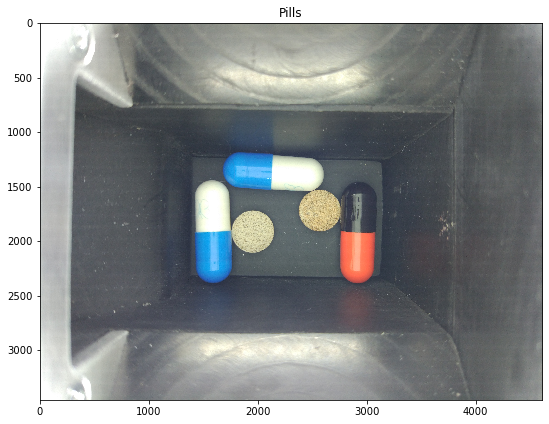

In [2]:
img = cv2.imread('pills.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Pills')
plt.show()

The test image used in this example can be downloaded from this [link](/images/pills.jpg).

The following code converts the image to HSV space and transforms the pixel values (e.g. normalization) to make them easier to plot. It's usually better to plot the color data using a script run from the terminal. This allows rotating the 3D plot and facilitates the task of finding value ranges for the target colors. A **color_plot** script is available in the [twoisprime](https://github.com/twoisprime/twoisprime) package.

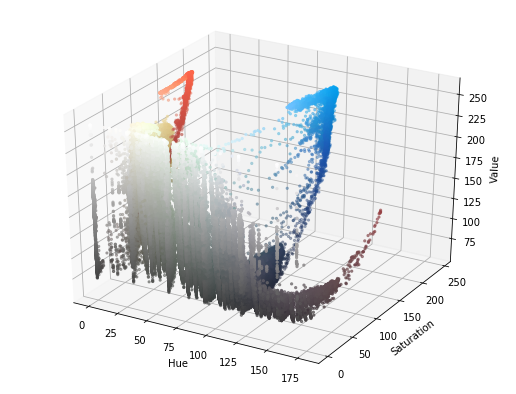

In [3]:
small = cv2.resize(img, (500, 500), interpolation=cv2.INTER_AREA)
pixel_colors = small.reshape((np.shape(small)[0] * np.shape(small)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
hsv = cv2.cvtColor(small, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Finding the appropriate color ranges is a trial and error process with this method. I have looked into clustering ideas but it doesn't seem to be straightforward. Please let me know if you have any tips!

The following three cells show the segmentation obtained for blue, brown (yellow), and red:

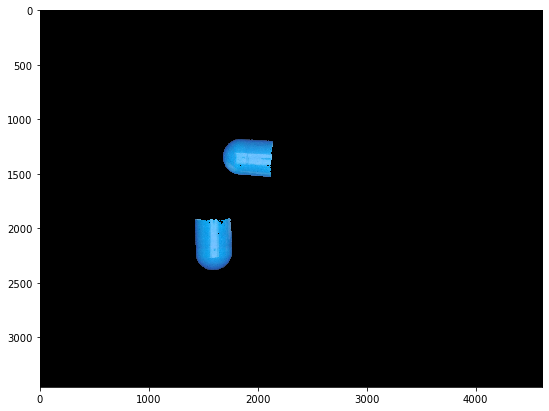

In [5]:
blue_range_min = (100, 125, 0)
blue_range_max = (125, 255, 255)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, blue_range_min, blue_range_max)
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(result)
plt.show()

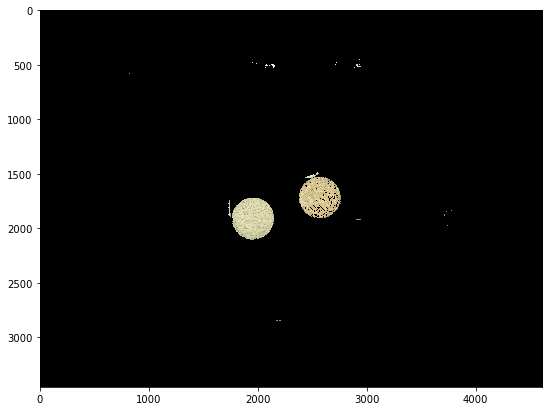

In [6]:
brown_range_min = (5, 35, 145)
brown_range_max = (35, 100, 255)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, brown_range_min, brown_range_max)
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(result)
plt.show()

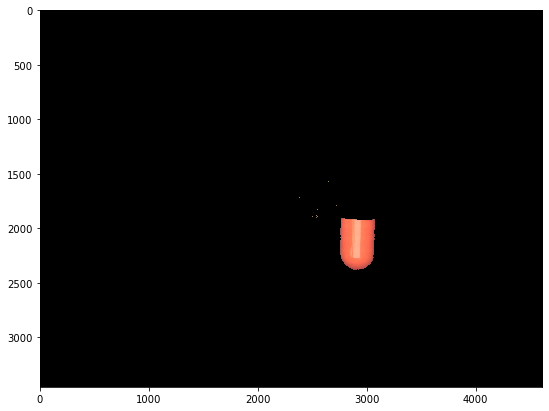

In [7]:
red_range_min = (0, 100, 0)
red_range_max = (20, 180, 255)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, red_range_min, red_range_max)
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(result)
plt.show()

Finally we can get the pill contours filtering by area. Calculating the convex hull makes the result look cleaner. Very simple and effective!

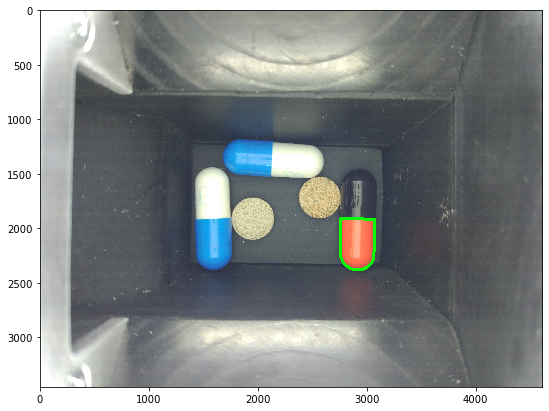

In [12]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
filtered = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 20000:        
        filtered.append(cv2.convexHull(contour))
img_contours = np.array(img)
cv2.drawContours(img_contours, filtered, -1, (0, 255, 0), 25)
plt.imshow(img_contours)
plt.show()

You can find this notebook [here](https://github.com/twoisprime/twoisprime.github.io/tree/master/notebooks/2020-07-06-color-segmentation-pills.ipynb).